### 딥러닝이란?
- 인간의 신경망을 모방하여, 학습 및 예측하는 기술
- 자연어 처리, 음성 처리, 영상 처리 등

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# 작업 위치 변경 (상대경로 사용하기 위함)
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/2. 딥러닝

/content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/2. 딥러닝


### 목표
- 공부시간에 따른 학생의 성적을 예측하는 회귀 모델(딥러닝) 만들기!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드
data = pd.read_csv("./data/student-mat.csv", delimiter = ";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [6]:
# 데이터 정보 확인
data.info()

# 결측치 없음
# Dtype 섞여있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 데이터 분리
- X, y 분리
- train, test 분리

In [10]:
# X, y 분리 - studytime 문제 활용

X = data[["studytime"]] # 공부시간 - 문제데이터는 항상 2차원 이상(대문자 표기)!
y = data["G3"]

In [11]:
X.shape, y.shape

((395, 1), (395,))

In [12]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2025)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 1), (119, 1), (276,), (119,))

#### 머신러닝(Sklearn) vs 딥러닝(Tensorflow, Keras) 차이
> 머신러닝
> - 모델 생성(완성된 객체) → 학습 → 예측 → 평가 등
> - 완제품 로봇에다가 도색하는 느낌(하이퍼 파라미터 조정)

> 딥러닝
> - 모델 생성(직접 구성) → 학습 → 예측 → 평가 등
> - 레고로 만드는 조립식 로봇 느낌

In [14]:
# 머신러닝 모델링
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.metrics import mean_squared_error    # mse (회귀 평가 지표, 오차 보는 도구)

In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mean_squared_error(y_test, y_pred)

23.164188168213375

### TensorFlow 모델링
1. 신경망 구조 설계
2. 학습 방법 설정
3. 학습
4. 예측, 평가

In [16]:
# 도구 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

# Sequential : 뼈대, 층을 순차적으로 쌓아 올리는 모델 구조를 지원하는 일종의 틀
# Dense(완전연결층) : 모든 입력 뉴런이 모든 출력 뉴런과 연결된 구조를 가지는 Layer (중간층, 출력층)

In [22]:
X_train.iloc[0].shape

(1,)

In [23]:
# 1. 신경망 구조 설계

# 뼈대 생성 (초기화)
model = Sequential()

# 입력층 - 입력 모양을 정하는 역할
model.add(InputLayer(shape = (1, ))) # 데이터 1ea의 모양을 지정

# 중간층(은닉층) - 직접적인 연산을 담당하는 구간
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 16, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))

# 출력층 - 출력 모양을 정하는 역할
model.add(Dense(
    units = 1,            # 1개의 뉴런 설정(실수값 1ea 예측)
    activation = "linear" # 모양 설정(연속형 데이터 예측하기 때문에, 가중합을 그대로 사용)
    )
)

# 출력층 모양을 정하는 방법
# 회귀     : 1, linear(기본값)
# 이진분류 : 1, sigmoid
# 다중분류 : 클래스 개수만큼, softmax

In [24]:
# 2. 학습 방법 설정 - 출력층에 따라 달라짐
model.compile(
    loss = "mean_squared_error",
    optimizer = "adam",
    metrics = ["mse"]
)

# 출력 모양에 따른 학습방법 설정 (loss, metrics)
# 회귀     : mean_squared_error, mse
# 이진분류 : binary_crossentropy, accuracy
# 다중분류 : sparse_categorical_crossentropy, accuracy

In [25]:
# 3. 학습
h = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 122.5565 - mse: 122.5565 - val_loss: 113.6927 - val_mse: 113.6927
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 122.4817 - mse: 122.4817 - val_loss: 111.7566 - val_mse: 111.7566
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 122.1701 - mse: 122.1701 - val_loss: 109.6420 - val_mse: 109.6420
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 119.8314 - mse: 119.8314 - val_loss: 106.6817 - val_mse: 106.6817
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 116.6143 - mse: 116.6143 - val_loss: 103.2529 - val_mse: 103.2529
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 106.0957 - mse: 106.0957 - val_loss: 99.4612 - val_mse: 99.4612
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 107.5577 - mse: 107.5577 - val_loss: 95.2384 - val_mse: 95.2384
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 96.2107 - mse: 96.2107 - val_loss: 90.6693 - val_mse: 90.6693
Epoch 9/20
7/7 ━━━━━━━━━━

In [26]:
# 4. 평가 - score랑 비슷한 함수
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.5972 - mse: 41.5972


[37.653438568115234, 37.653438568115234]

In [29]:
h.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

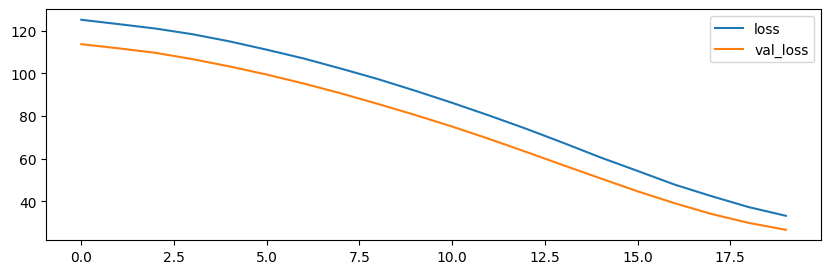

In [30]:
# 학습 결과 시각화

plt.figure(figsize = (10, 3))

plt.plot(h.history["loss"], label = "loss")
plt.plot(h.history["val_loss"], label = "val_loss")

plt.legend()

plt.show()

# 학습결과 시각화를 통해서 과적합 여부 등을 판단할 수 있음!

### 실습! 문제 데이터 4ea로 학습 및 시각화

In [31]:
data.info()
# studytime, traveltime, freetime, health

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [32]:
# X, y 분리
X = data[["studytime", "traveltime", "freetime", "health"]]
y = data["G3"]

In [33]:
X.shape, y.shape

((395, 4), (395,))

In [34]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2025)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 4), (119, 4), (276,), (119,))

In [36]:
# 1. 신경망 구조 설계

# 뼈대 생성 (초기화)
model2 = Sequential()

# 입력층 - 입력 모양을 정하는 역할
model2.add(InputLayer(shape = (4, ))) # 데이터 1ea의 모양을 지정

# 중간층(은닉층) - 직접적인 연산을 담당하는 구간
model2.add(Dense(units = 16, activation = "relu"))
model2.add(Dense(units = 32, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 32, activation = "relu"))
model2.add(Dense(units = 16, activation = "relu"))
# 유닛(노드, 뉴런)의 수 : 일반적인 경험에 의하면 대부분의 상황에서는 "항아리 모양"이 Best!
# 활성화 함수로는 relu 계열을 주로 많이 활용

# 출력층 - 출력 모양을 정하는 역할
model2.add(Dense(units = 1, activation = "linear"))

# 2. 학습 방법 설정 - 출력층에 따라 달라짐
model2.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mse"])
# 최적화 함수로는 주로 adam이 활용됨

# 3. 학습
h2 = model2.fit(X_train, y_train, validation_split = 0.2, epochs = 40)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 121.3812 - mse: 121.3812 - val_loss: 98.7923 - val_mse: 98.7923
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 102.9632 - mse: 102.9632 - val_loss: 81.4796 - val_mse: 81.4796
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 86.1310 - mse: 86.1310 - val_loss: 61.2690 - val_mse: 61.2690
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 63.6646 - mse: 63.6646 - val_loss: 39.5343 - val_mse: 39.5343
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 35.2186 - mse: 35.2186 - val_loss: 24.6875 - val_mse: 24.6875
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.5161 - mse: 26.5161 - val_loss: 27.8140 - val_mse: 27.8140
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27.0041 - mse: 27.0041 - val_loss: 27.6395 - val_mse: 27.6395
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27.0183 - mse: 27.0183 - val_loss: 23.6543 - val_mse: 23.6543
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/

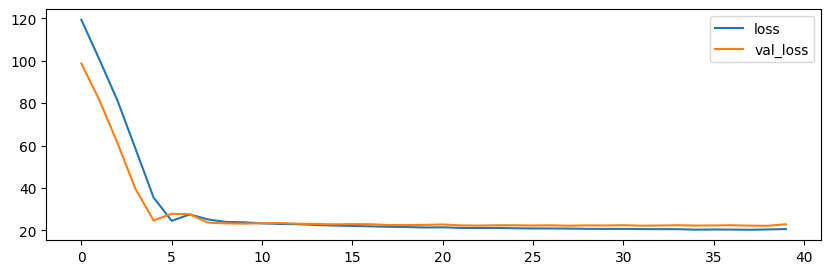

In [37]:
# 학습 결과 시각화

plt.figure(figsize = (10, 3))

plt.plot(h2.history["loss"], label = "loss")
plt.plot(h2.history["val_loss"], label = "val_loss")

plt.legend()

plt.show()